<a href="https://colab.research.google.com/github/Drynya7/logit_model/blob/main/logit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from scipy.special import expit # функция для сигмоиды

In [ ]:
n_samples = 100 # число примеров
np.random.seed(0) # инициализация генератора случайных чисел
X = 1*np.random.normal(size=n_samples) # случаные числа по х, с нормальным законом распределения
y = (X > 0).astype(np.float) # класс 1 если больше нуля, 0 иначе, преобразуем в тип float
X[X > 0] *= 4 # умножим примеры входов из класса 1 на 4
X += .3 * np.random.normal(size=n_samples) # добавим ко всем примерам входа шум - случаные числа не очень большого разброса
X = X[:, np.newaxis] # сделаем столбец, добавив новое измерение к массиву, был одномерный станет двумерный. Можно было бы использовать reshape как раньше


<ipython-input-6-2a8c7ffb2cb3>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (X > 0).astype(np.float) # класс 1 если больше нуля, 0 иначе, преобразуем в тип float


In [ ]:
log_reg = linear_model.LogisticRegression(C=1e5, max_iter=200) # создаем логистическую регрессию, C ставим побольше, это значит регуляризация будет влиять мало на результат
log_reg.fit(X, y) # обучаем модель, мы не стали разделять на обучающие и тестовые данные сейчас.

LogisticRegression(C=100000.0, max_iter=200)

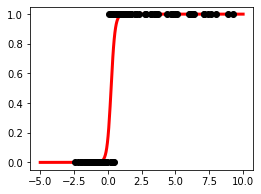

In [ ]:
plt.figure(1, figsize=(4, 3))  
plt.clf() 
plt.scatter(X.ravel(), y, color='black', zorder=20) # ravel() вытягивает массив, превращая его в одномерный
X_test = np.linspace(-5, 10, 300) # теперь создадим тестовые примеры входов
loss = expit(X_test * log_reg.coef_ + log_reg.intercept_).ravel() # вручную
loss1 = log_reg.predict_proba(X_test[:, np.newaxis])[:,1].ravel() # через predict_proba, берем второй столбец (индекс 1) , чтобы сам выход вернуть
plt.plot(X_test, loss1, color='red', linewidth=3) #